<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/CV_CNN/class_001_blood_cells_may_08_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [2]:
import cv2

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from glob import glob

import zipfile


In [3]:
IMAGE_SIZE = [224,224]
epochs = 16
batch_size = 128

In [4]:
!gdown 1CU4UkqJae07u1tKfp2rajWwwZA0SKiIm

Downloading...
From: https://drive.google.com/uc?id=1CU4UkqJae07u1tKfp2rajWwwZA0SKiIm
To: /content/blood_cell_images.zip
100% 110M/110M [00:02<00:00, 45.4MB/s]


In [5]:
FILE='blood_cell_images.zip'

In [6]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [7]:
!ls

blood_cell_images  blood_cell_images.zip  __MACOSX  sample_data


In [8]:
train_path = 'blood_cell_images/TRAIN'
test_path = 'blood_cell_images/TEST'
images_test = glob(test_path + '/*/*.jp*g')
images_train = glob(train_path + '/*/*.jp*g')

In [9]:
folders_train = glob(train_path + '/*')
folders_test = glob(test_path + '/*')

In [10]:
folders_train

['blood_cell_images/TRAIN/LYMPHOCYTE',
 'blood_cell_images/TRAIN/NEUTROPHIL',
 'blood_cell_images/TRAIN/MONOCYTE',
 'blood_cell_images/TRAIN/EOSINOPHIL']

In [11]:
folders_test

['blood_cell_images/TEST/LYMPHOCYTE',
 'blood_cell_images/TEST/NEUTROPHIL',
 'blood_cell_images/TEST/MONOCYTE',
 'blood_cell_images/TEST/EOSINOPHIL']

In [12]:
ntrain, ntest = len(images_train),len(images_test)
ntrain,ntest

(9957, 2487)

In [13]:
images_train[:4]

['blood_cell_images/TRAIN/LYMPHOCYTE/_14_5028.jpeg',
 'blood_cell_images/TRAIN/LYMPHOCYTE/_2_2119.jpeg',
 'blood_cell_images/TRAIN/LYMPHOCYTE/_16_300.jpeg',
 'blood_cell_images/TRAIN/LYMPHOCYTE/_21_665.jpeg']

In [14]:
types = ['NEUTROPHIL', 'EOSINOPHIL', 'MONOCYTE', 'LYMPHOCYTE']

In [15]:

X_train =[]
y_train =[]
names_train =[]
for i in range(ntrain): 
  img = image.load_img(images_train[i])
  im = cv2.resize(np.array(img), (224, 224))
  
  X_train.append(im)

  if(types[0] in images_train[i]):
    names_train.append(types[0])
    
    y_train.append(0)
  elif(types[1] in images_train[i]):
    names_train.append(types[1])
    y_train.append(1)
  elif(types[2] in images_train[i]):
    names_train.append(types[2])
    y_train.append(2)
  else:
    names_train.append(types[3])
    y_train.append(3)

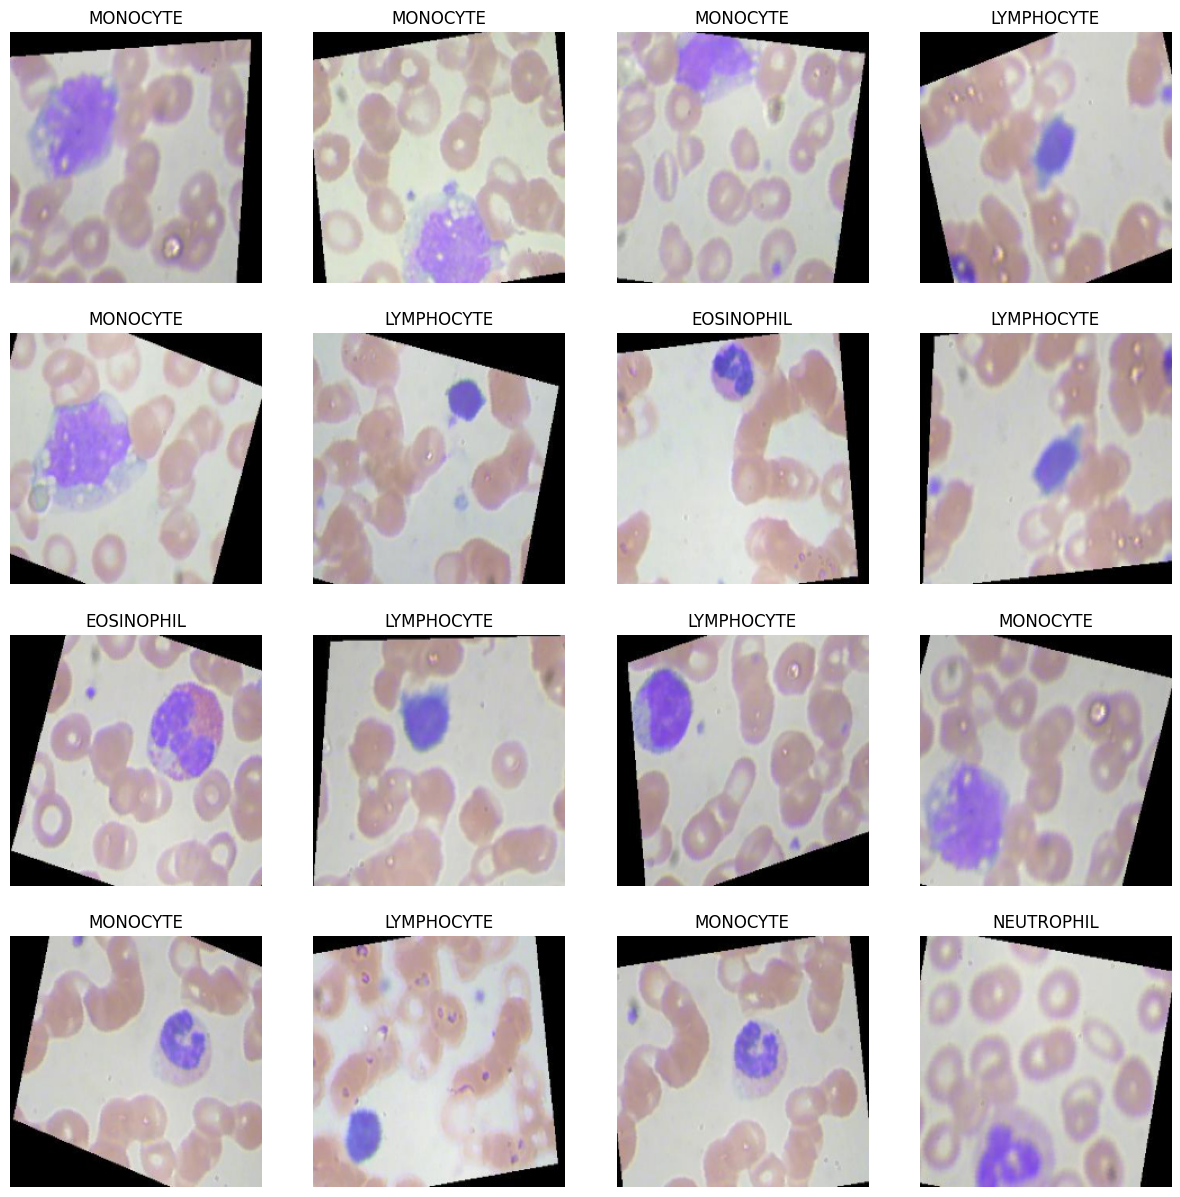

In [16]:
plt.figure(figsize=(15, 15))

for i in range(16): 
  ax = plt.subplot(4, 4, i + 1)
  k = int(np.random.choice(range(ntrain)))
  plt.imshow(X_train[k])
  plt.title(names_train[k])
  plt.axis("off")

In [17]:
names_train[0]

'LYMPHOCYTE'